In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tkinter import Tk
from tkinter import filedialog as fd
import os
from scipy.optimize import curve_fit
from scipy.optimize import brute
from scipy import asarray as ar,exp
import math

In [ ]:
#return a bool indicating if a string can be represented numerically
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

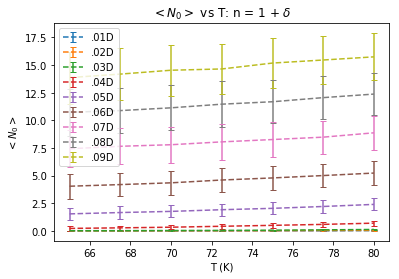

In [17]:
#read in all the electron 
root = Tk()
folder_selected = fd.askdirectory(title = "Choose the folder all directories")
root.withdraw()
disorderFolders = [ f.path for f in os.scandir(folder_selected) if f.is_dir() ]

allResults = {}
for i in disorderFolders:
    disorder = i[-4:]
    temperatureFolders = [ f.path for f in os.scandir(i) if f.is_dir()]
    disorderData = []
    for i in temperatureFolders:
        T = float(i[-4:])
        zeroFilling = []
        singleFilling = []
        doubleFilling = []
        for file in os.listdir(i):
            f = open(i + '/' + file)
            index = 1
            for line in f:
                if index > 1:
                    newline = line.split()
                    zeroFilling.append(float(newline[0]))
                    singleFilling.append(float(newline[1]))
                    doubleFilling.append(float(newline[2]))
                index += 1
        zeroArray = np.asarray(zeroFilling)
        zeroData = [np.mean(zeroArray), np.std(zeroArray)]
        
        singleArray = np.asarray(singleFilling)
        singleData = [np.mean(singleArray), np.std(singleArray)]
        
        doubleArray = np.asarray(doubleFilling)
        doubleData = [np.mean(doubleArray), np.std(doubleArray)]
        
        disorderData.append([T, np.mean(zeroArray), np.std(zeroArray), np.mean(singleArray), np.std(singleArray), np.mean(doubleArray), np.std(doubleArray)])
        
    allResults[disorder] = disorderData
    
fig = plt.figure(figsize = (6,4))
#fig.subplots_adjust(top = 0.98, bottom = 0.02, right = 0.98)
plt.rcParams["font.family"] = 'sans-serif'
for key, value in allResults.items():
    valueArray = np.asarray(value)
    tArray = valueArray[:,0]
    zeroArray = valueArray[:,1]
    zeroσArray = valueArray[:,2]
    oneArray = valueArray[:,3]
    oneσArray = valueArray[:,4]
    twoArray = valueArray[:,5]
    twoσArray = valueArray[:,6]
    plt.errorbar(tArray, zeroArray, linestyle = "--", yerr = zeroσArray, capsize = 3.0, label = key)
    #plt.errorbar(tArray, twoArray, linestyle = "--", yerr = twoσArray, capsize = 3.0, label = "Two Filling Occupancy")
plt.ylabel("$<N_0>$")
plt.xlabel("T (K)")
plt.title("$<N_0>$ vs T: n = 1 + $\delta$")
plt.legend()
fig.savefig('801electronN0Visualization.png', format='png', dpi=300)
plt.show()
    